In [41]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# df_base = pd.read_csv("agent_47_base/train_stats.csv")
df_base = pd.read_csv("agent_47/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean
count,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000,268.000000
mean,0.0,133.500000,74.212687,5.597015,463.059701,0.075050,0.717153,0.0,281.507914,23.903584
std,0.0,77.509139,65.752711,5.560858,553.721800,0.180998,0.653076,0.0,177.815457,9.764261
min,0.0,0.000000,2.000000,0.000000,-100.000000,0.001000,0.016433,0.0,0.000000,0.000000
25%,0.0,66.750000,11.000000,0.000000,-100.000000,0.001000,0.099057,0.0,104.161562,19.422659
50%,0.0,133.500000,62.500000,4.000000,300.000000,0.001062,0.570666,0.0,251.278046,24.109793
75%,0.0,200.250000,122.250000,10.000000,900.000000,0.032596,1.182090,0.0,434.436249,26.825383
max,0.0,267.000000,252.000000,20.000000,1900.000000,1.000000,2.707920,0.0,627.523682,80.188080


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean
0,0,0,0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean


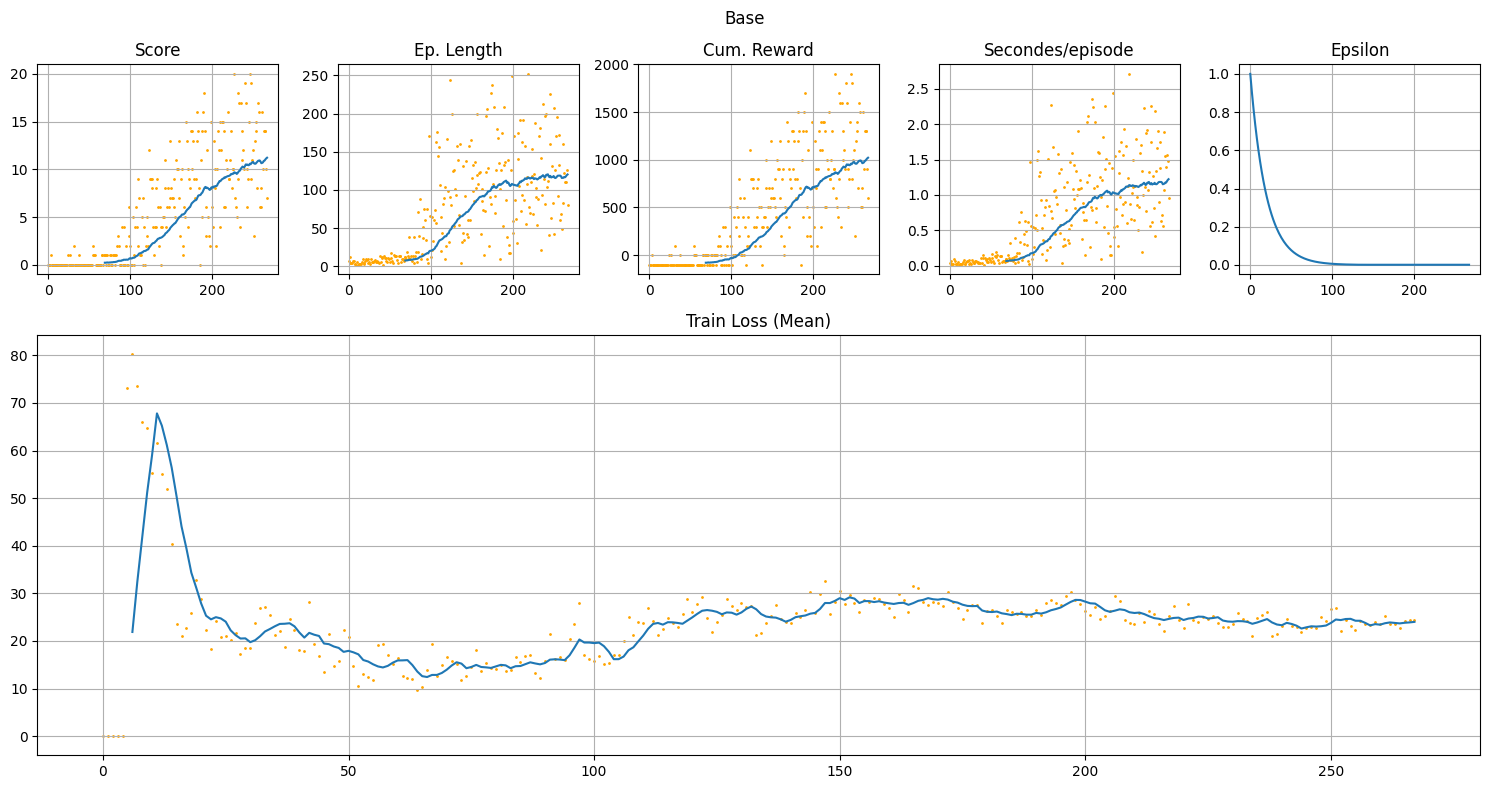

Total time: 192.2
Max Score: 20 a 227
Max Cum. Reward: 1900.0 a 227
Max Ep. Length: 252 a 219


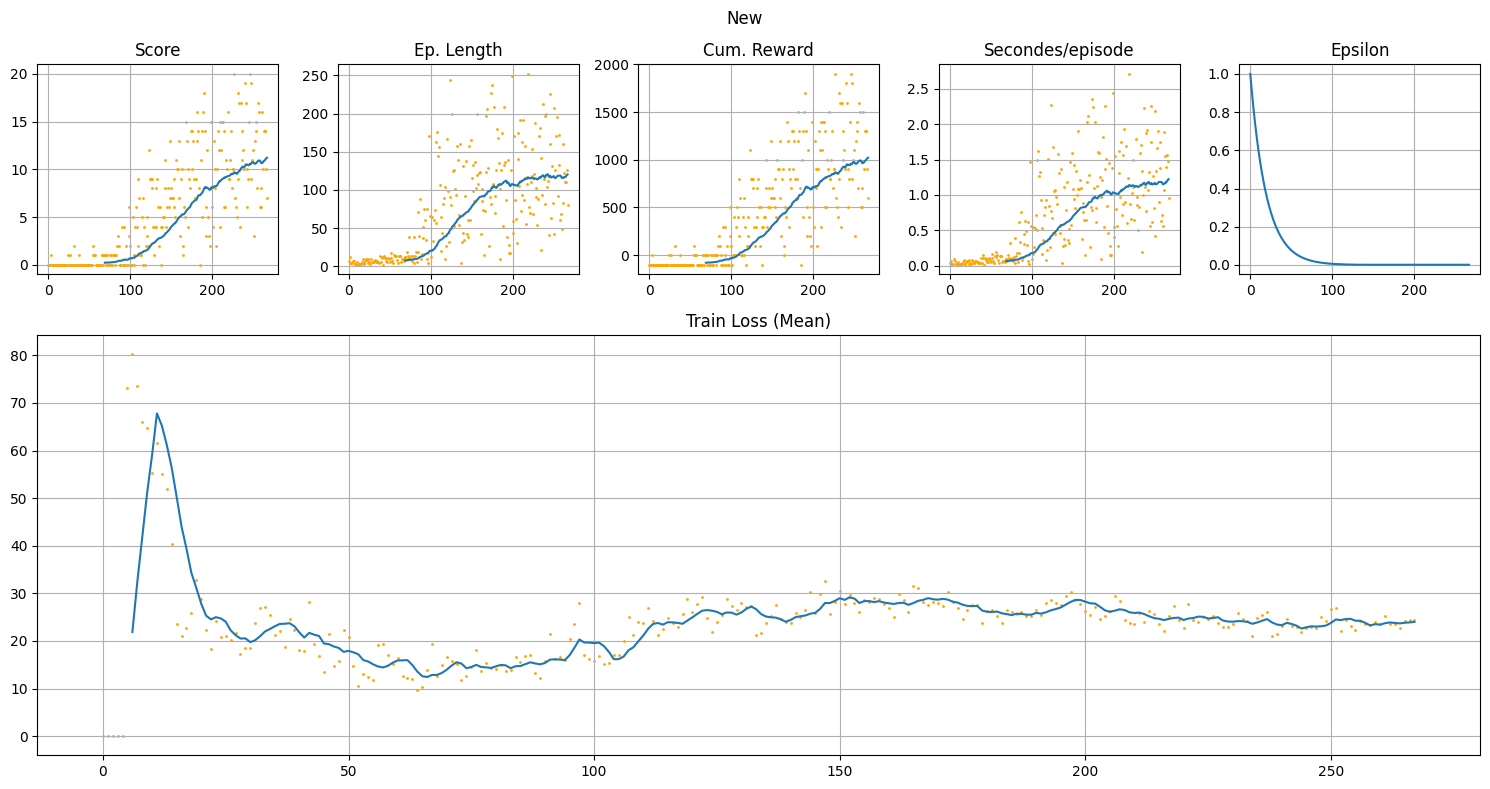

Total time: 192.2
Max Score: 20 a 227
Max Cum. Reward: 1900.0 a 227
Max Ep. Length: 252 a 219


In [46]:
def graph(df, title, ROLLING=70):
    layout = [
        ["A", "B", "C", "D", "E"],
        ["F", "F", "F", "F", "F"]
    ]

    fig, ax = plt.subplot_mosaic(layout, figsize=(15, 8), height_ratios=[1, 2])

    ax["A"].plot(df.Episode, df.Score.rolling(ROLLING).mean())
    ax["A"].scatter(df.Episode, df.Score, s=1, color="orange")
    ax["A"].set_title("Score")
    ax["A"].grid()

    ax["B"].plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    ax["B"].scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    ax["B"].set_title("Ep. Length")
    ax["B"].grid()

    ax["C"].plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
    ax["C"].scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
    ax["C"].set_title("Cum. Reward")
    ax["C"].grid()

    ax["D"].plot(df.Episode, df.EpisodeDuration.rolling(ROLLING).mean())
    ax["D"].scatter(df.Episode, df.EpisodeDuration, s=1, color="orange")
    ax["D"].set_title("Secondes/episode")
    ax["D"].grid()

    ax["E"].plot(df.Episode, df.Epsilon)
    ax["E"].set_title("Epsilon")
    ax["E"].grid()

    ax["F"].plot(df.Episode, df.TrainLossMean.rolling(ROLLING // 10).mean())
    ax["F"].scatter(df.Episode, df.TrainLossMean, s=1, color="orange")
    ax["F"].set_title("Train Loss (Mean)")
    ax["F"].grid()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())
    print("Max Ep. Length:", df.EpisodeLength.max(), "a", df.EpisodeLength.argmax())

graph(df_base, "Base")
graph(df, "New")